In [54]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from flask import jsonify



In [8]:
df = pd.read_csv('finalModelData.csv')

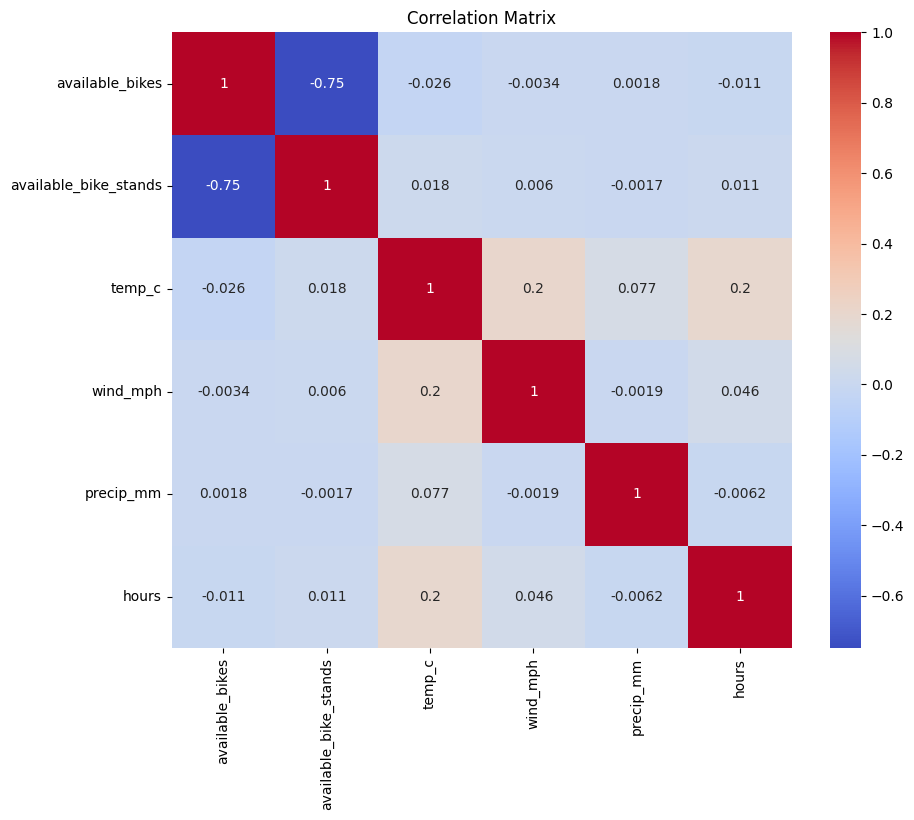

In [9]:
#correlation matrix 
columns_to_correlate = ['available_bikes', 'available_bike_stands', 'temp_c', 'wind_mph', 'precip_mm', 'hours']

corr_matrix = df[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [70]:
stationID = df['number'].unique()
df = df.drop_duplicates()


for station in stationID:
    df_station = df[df['number'] == station]

    #split data 
    X = df_station[['temp_c', 'wind_mph', 'precip_mm', 'hours']]
    Y = df_station[['available_bikes']]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    #model 
    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    print(r2_score(Y_test, predictions))
    
    #save
    filename = f'model_{station}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model for station {station} saved to {filename}")


0.19616278803207987
Model for station 42 saved to model_42.pkl
0.058330459955920344
Model for station 30 saved to model_30.pkl
0.19879411895252652
Model for station 54 saved to model_54.pkl
0.06937144471422008
Model for station 108 saved to model_108.pkl
0.08213335678079814
Model for station 20 saved to model_20.pkl
0.014984937194338244
Model for station 56 saved to model_56.pkl
0.08153218617995661
Model for station 6 saved to model_6.pkl
0.01300792001764528
Model for station 18 saved to model_18.pkl
0.046652031595254995
Model for station 32 saved to model_32.pkl
0.298326670141255
Model for station 52 saved to model_52.pkl
0.09824306163426522
Model for station 48 saved to model_48.pkl
0.16919634939102535
Model for station 13 saved to model_13.pkl
0.07060230866750516
Model for station 43 saved to model_43.pkl
0.06863805766284714
Model for station 31 saved to model_31.pkl
0.0824065173654478
Model for station 98 saved to model_98.pkl
0.07853233036143525
Model for station 14 saved to model

In [67]:
def predict(stationid, temp_c, wind_mph, precip_mm, hours):

    filename = f'model_{stationid}.pkl' # Replaces {station} with the actual station ID
    with open(filename, 'rb') as file:
        model = pickle.load(file)

    df_prediction = pd.DataFrame({
        'temp_c': [temp_c], 
        'wind_mph': [wind_mph],
        'precip_mm': [precip_mm],
        'hours': [hours] 
    })

    # Predict the number of available bikes
    predicted_bikes = model.predict(df_prediction)
# Convert the NumPy array to a Python list
    # predicted_bikes_list = predicted_bikes.tolist()
    

    return {'avail': predicted_bikes[0]}

In [75]:
results = {}

for station in stationID:
    df_station = df[df['number'] == station]

    #split data 
    X = df_station[['temp_c', 'wind_mph', 'precip_mm', 'hours']]
    Y = df_station[['available_bikes']]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    #model 
    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    # Error metrics calculation
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    # mae = mean_absolute_error(Y_test, predictions)
    r_squared = r2_score(Y_test, predictions)

    results[station] = {
        'r_squared': r_squared,
        'predictions': predictions.tolist(),  # Convert predictions to a list for easier manipulation
        'mse': mse,
        'rmse': rmse,
        # 'mae': mae
    }

max_station = max(results.items(), key=lambda x: x[1]['r_squared'])

# Calculate the average R-squared value
average_r_squared = sum(result['r_squared'] for result in results.values()) / len(results)

# Find stations with R-squared values above a certain threshold (e.g., 0.8)
threshold = 0.8
high_r_squared_stations = [(station, result['r_squared']) for station, result in results.items() if result['r_squared'] > threshold]

# Calculate total number of stations
total_stations = len(results)

# Calculate the number of stations with R-squared values above the threshold
num_high_r_squared_stations = len(high_r_squared_stations)

# Find the station with the minimum RMSE
min_rmse_station = min(results.items(), key=lambda x: x[1]['rmse'])

# Print the results
print("Station with Maximum R-squared:")
print("Station:", max_station[0])
print("R-squared:", max_station[1]['r_squared'])
print("Predictions:", max_station[1]['predictions'])
print()

print("Average R-squared:", average_r_squared)
print()

print("Stations with R-squared above", threshold, ":")

for station, r_squared in high_r_squared_stations:
    print("Station:", station)
    print("R-squared:", r_squared)
    print()

print("Total number of stations:", total_stations)
print("Number of stations with R-squared above", threshold, ":", num_high_r_squared_stations)
print()

print("Station with Minimum RMSE:")
print("Station:", min_rmse_station[0])
print("RMSE:", min_rmse_station[1]['rmse'])
print("Predictions:", min_rmse_station[1]['predictions'])

Station with Maximum R-squared:
Station: 52
R-squared: 0.298326670141255
Predictions: [[14.905704646570348], [21.02530081151949], [11.218582098044102], [10.973432746376375], [13.471987831110251], [4.173727215262206], [18.150069902005058], [17.344780518649387], [17.179818732391492], [21.24011304539075], [11.690291154106422], [10.246945573604853], [17.3882190424942], [4.173727215262206], [4.173727215262206], [11.465029577913871], [16.23173295632188], [14.905704646570348], [17.047471681998843], [11.548880116218164], [23.233969892538788], [4.483126548793685], [10.33373539467083], [13.0653493341915], [7.7315292227811305], [11.224173444532834], [10.033144248901003], [4.173727215262206], [8.51831618548731], [10.545895564815037], [20.067586270408405], [9.544573926748836], [9.723744915369526], [12.473861275539683], [4.173727215262206], [11.218582098044102], [18.348872866366968], [18.348872866366968], [9.132256856717706], [10.08299469651437], [21.02530081151949], [18.348872866366968], [13.015498

R-Squared: 
- represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in a regression model.
- ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable based on the independent variables, and 0 indicates that the model does not explain any of the variability in the target variable.
- evaluates the goodness of fit of a regression model.

Minimum RMSE:
- measure of the differences between the predicted values by a model and the actual values observed.
- gives an estimate of the standard deviation of the prediction errors. A lower RMSE indicates better performance of the model in terms of prediction accuracy.
 
